In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/UBC-MDS/dsci_573_credit_default_nse_ark_ss

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

import altair as alt
from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

As a part of this classification problem, we're trying to understand whether a credit card customer would default on the subsequent bill payment, given their payment history and other factors such as like age, gender, and the level of education. 

There are a total of 24 features and a brief description of the type of features can be found below:

Categorical Features:
- MARRIAGE: Marital status 

Ordinal Features:
- EDUCATION: Level of eduction

Binary Featus:
- SEX: Sex of the person. Although this field is not binary in nature, the data was recorded such that 1=male, 2=female.

Numeric Features:
- LIMIT_BAL: Amount of credit provided.
- ID: ID of the client
- AGE: Age of the client
- PAY_i, i HAS VALUES 0,2,3,4,5,6: Whether credit is repayed or not for months from September to April, 2005. (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- BILL_AMTi, i RANGES FROM 1 TO 6: Credit card bill for months from September to April, 2005. 
- PAY_AMTi, i RANGES FROM 1 TO 6: Amount paid previously from September to April, 2005. 

Some of the concerns analysing the data are:
1. The target name `default.payment.next.month` is not consistent as it used `.` over `_`. Also, for the field PAY_i the month of September is denoted by subscipt 0 while for the fields BILL_AMTi and PAY_AMTi it is denoted by the subscipt 1.
2. As per the metadata of the dataset, EDUCATION is defined with numbers 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown. There is no clear reason why there are 2 different levels that signify unknown. Also, there is no clear reason why this is not combined with the category "Others". As a part of this analysis, we'll be merging values in 5 and 6 into 4. Out of the 4 possible values indication graduate school, university,  high school, and others, others is a considerable minority class. To understand whether they should be higher or lower on the scale of ordinality, we'll rely on the EDA.
3. Although the current encoding for `EDUCATION` might be alright since the feature is ordinal, for better interpretability, it would be best if we can encode them such that higher qualifications take up higher values in the encoding scale. To perform this encoding, later on, it is best to replace the numbers with actual categories.
4. As per the metadata of the dataset, `MARRIAGE` is defined with numbers 1=married, 2=single, and 3=others, but the data contains 0 as well. We'll combine 0 along with the "Others" category as we did with `EDUCATION`.
5. Since `MARRIAGE` is not technically an ordinal feature, it'll be good to convert it to actual categories rather than the current representation of numbers because there is no inherent ordering between the categories. One Hot encoding would be preferred here. 
6. Similar to `MARRIAGE` and `EDUCATION`, although `PAY_i` should be in one of -1, 1, 2, ..., 9, the data contains 0 and -2. Also, if the value here represents the repayment delays, ideally 0 should represent no payment delay. As we cannot drop these columns as there is a huge chunk of data with these undocumented values, we're transforming this feature to make -1 and -2 to 0. 
7. To improve the final interpretation, the feature `SEX` can be transformed into its corresponding categories so that it can be binary encoded instead of encoding as 1s and 2s.

In [3]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")

In [4]:
# No NaNs in any of the cols.
pd.isnull(credit_df).sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Feature Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# Feature describe
credit_df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [7]:
# First 5 rows
credit_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [8]:
# Last 5 rows
credit_df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[5 rows x 25 columns]

In [9]:
# Unique values for Sex
credit_df["SEX"].unique()

array([2, 1], dtype=int64)

In [10]:
# Unique values for EDUCATION
credit_df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [11]:
# Unique values for MARRIAGE
credit_df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
# Unique values for PAY_0
credit_df["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [13]:
# Address Concern 1: Consistent syntax in column naming
credit_df = credit_df.rename(
    columns={
        "default.payment.next.month": "default_payment_next_month",
        "PAY_0": "PAY_1",
    }
)

In [14]:
# Address Concern 2 and 3: Remapping values in the EDUCATION feature 
credit_df["EDUCATION"] = credit_df["EDUCATION"].apply(
    lambda cell_value:
    "Graduate" if cell_value == 1
    else "Undergrad" if cell_value == 2
    else "HighSchool" if cell_value == 3
    else "Others")

In [15]:
# Address Concern 4 and 5: Remapping values in the MARRIAGE feature 
credit_df["MARRIAGE"] = credit_df["MARRIAGE"].apply(
    lambda cell_value:
    "Married" if cell_value == 1
    else "Single" if cell_value == 2
    else "Others")

In [16]:
# Address Concern 6: Remapping values in the PAY_i feature 
for i in range(1, 7):
    query = f'PAY_{i}==-2 or PAY_{i}==-1 or PAY_{i}==0'
    credit_df.loc[credit_df.query(query).index, f'PAY_{i}'] = 0

In [17]:
# Address Concern 7: Remapping values in the SEX feature 
credit_df["SEX"] = credit_df["SEX"].apply(
    lambda cell_value:
    "Male" if cell_value == 1
    else "Female")

In [18]:
# Drop ID column as it is useless. Doing it now itself to reduce the load on the column transformer later.
credit_df = credit_df.drop('ID', axis=1)
# change target data type
credit_df["default_payment_next_month"] = credit_df["default_payment_next_month"].astype("category")

In [19]:
# Final State of the data frame after transformations
credit_df.head(7)

LIMIT_BAL     SEX  EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0  Female  Undergrad  Married   24      2      2      0      0   
1   120000.0  Female  Undergrad   Single   26      0      2      0      0   
2    90000.0  Female  Undergrad   Single   34      0      0      0      0   
3    50000.0  Female  Undergrad  Married   37      0      0      0      0   
4    50000.0    Male  Undergrad  Married   57      0      0      0      0   
5    50000.0    Male   Graduate   Single   37      0      0      0      0   
6   500000.0    Male   Graduate   Single   29      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
5      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
6      0  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  
5    1000.0    1000.0     800.0                           0  
6   20239.0   13750.0   13770.0                           0  

[7 rows x 24 columns]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [20]:
train_df, test_df = train_test_split(credit_df, test_size=0.6, random_state=573)
X_train, y_train = train_df.drop(columns=['default_payment_next_month']), train_df['default_payment_next_month']
X_test, y_test = test_df.drop(columns=['default_payment_next_month']), test_df['default_payment_next_month']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

### ANSWER 3.1

In [21]:
# Proportion of credit defaulters
targest_classes = y_train.value_counts()
round(targest_classes[1] / (targest_classes[0] + targest_classes[1]) * 100, 3)

22.258

In [22]:
# Proportion of credit non-defaulters
round(targest_classes[0] / (targest_classes[0] + targest_classes[1]) * 100, 3)

77.742

Summary Statistic 1:  
In the dataset, there is a class imbalance. While around 77.84 % of the people do not default on the bill payments, only 22.16% of the population defaults on their bill payments.  

In [23]:
education_matrix = pd.crosstab(train_df.EDUCATION, train_df.default_payment_next_month)
education_matrix['percent_default'] = (education_matrix[1]/(education_matrix[0] + education_matrix[1])) * 100
education_matrix.sort_values(by='percent_default', ascending=False)

default_payment_next_month     0     1  percent_default
EDUCATION                                              
HighSchool                  1460   495        25.319693
Undergrad                   4218  1335        24.041059
Graduate                    3480   828        19.220056
Others                       171    13         7.065217

Summary Statistic 2:  
People with higher educational qualifications are are associated with lesser defaults in credit re-payments. 

In [24]:
# Viz 1:
alt.data_transformers.disable_max_rows()
import altair as alt

numeric_cols = ["LIMIT_BAL", "AGE", "PAY_1", "BILL_AMT1", "PAY_AMT1"]

alt.Chart(train_df, title="Distribution of numeric features").mark_bar(opacity=0.4).encode(
    x=alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=40)),
    y=alt.Y("count()", stack=False),
    color="default_payment_next_month",
).properties(width=500, height=200).repeat(numeric_cols, columns=1)


alt.RepeatChart(...)

`LIMIT_BAL` and `AGE` seems to have right-skewed distributions, with more people defaulting on the lower scales of the features and gradually declining as we move towards the right of the scale.

In [25]:
train_df_copy = train_df.copy()
train_df_copy["default_payment_next_month"] = train_df_copy["default_payment_next_month"].astype("int")
corr_matrix = train_df_copy.corr().style.background_gradient()
corr_matrix

Features `PAY_1`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, and `PAY_6` are positively correlated with each other. Similarly, features `BILL_AMT1`, `BILL_AMT2`, `BILL_AMT3`, `BILL_AMT4`, `BILL_AMT5`, and `BILL_AMT6` are positively heavily correlated with each other

### ANSWER 3.2

From the initial analysis of the data, we saw that although there are no missing values in the dataset, certain features (`MARRIAGE`, `EDUCATION`, `PAY_i`) had undocumented values that needed manual corrections. This was done as a part of the pre-processing step. From summary statistic 1, we can see that there is a clear class imbalance with 22.16% of the people defaulting the credit repayment. From the EDA and summary statistic 2, we see that lower re-payment defaults are associated with people with higher qualifications. As the percentage of people in "Others" is fewer compared to the other categories and since they have a lower percent of in terms of credit defaults, it makes sense to place them on a higher level on the ordinal scale. Although this might not hold in all cases, we're hoping that this assumption holds in the production data as well. Since there is an inherent order in the `PAY_i` feature, it is best to consider this as an ordinal feature that is already encoded. From the correlation matrix, we see that time series features such as `PAY_i` and `BILL_AMTi` are heavily correlated. Surprisingly, the time series data for the features `PAY_AMTi` have minimal correlation when compared to the correlations visible in the clusters `PAY_i` and `BILL_AMTi`. Against the target `default_payment_next_month`, features `PAY_1` and `PAY_2` seem to be the highest correlated. From the visualizations of the key numeric features, we can see that `LIMIT_BAL` and `AGE` seems to have right-skewed distributions, with more people defaulting on the lower scales of the features and gradually declining as we move towards the right of the scale. From the distribution for credit repayment for September, we can see that the distribution is similar to an exponential distribution with a peak at 0 and declining as we look at the number of people who have consistently missed the repayment. 

### ANSWER 3.3

In this scenario, as we're interested in predicting whether the client would default or not in their credit repayment, the positive class is that the customer defaults. 
- False Positives: Wrongly predicting that the customer would default when they actually don't.
- False Negatives: Wrongly predicting that the customer would repay the credit when they actually don't.

As there is a class imbalance, relying solely on accuracy alone is not ideal. 
- Reducing false positives is important as the company's reputation and customer satisfaction are at stake. Too many wrong predictions and escalations could drive down the business and the number of clients using the service.
- Reducing false negatives is also crucial as it would help the company take the necessary steps to prepare for when the client misses the repayment and plan for risk management. 

Hence, we'll be optimizing the F1 score while at the same time looking at Recall, Precision, and Accuracy. 

In [26]:
scoring_metrics = ["f1", "accuracy", "precision", "recall"]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [27]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [28]:
scalable_features = [
        "LIMIT_BAL",
        "AGE",
        "PAY_1",
        "PAY_2",
        "PAY_3",
        "PAY_4",
        "PAY_5",
        "PAY_6",
        "BILL_AMT1",
        "BILL_AMT2",
        "BILL_AMT3",
        "BILL_AMT4",
        "BILL_AMT5",
        "BILL_AMT6",
        "PAY_AMT1",
        "PAY_AMT2",
        "PAY_AMT3",
        "PAY_AMT4",
        "PAY_AMT5",
        "PAY_AMT6",
    ]
categorical_feats = ["MARRIAGE"]
binary_feats = ["SEX"]
ordinal_features = ["EDUCATION"]

education_levels = [
    "HighSchool",
    "Undergrad",
    "Graduate",
    "Others",
]

ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)

column_transformer = make_column_transformer(
        (StandardScaler(), scalable_features),
        (OrdinalEncoder(categories=[education_levels], dtype=int), ordinal_features),
        (OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical_feats),
        (
            OneHotEncoder(sparse=False, handle_unknown="ignore", drop="if_binary"),
            binary_feats,
        )
    )

column_transformer.fit(X_train)
column_transformer.verbose_feature_names_out = False
X_train_enc = pd.DataFrame(column_transformer.transform(X_train), index=X_train.index, columns=column_transformer.get_feature_names_out()) 
X_train_enc

LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4     PAY_5  \
11997  -0.595569 -0.153433  0.857150  2.099797 -0.393042 -0.344872 -0.312016   
2943   -1.137066 -1.244772 -0.477282 -0.407798  2.146125 -0.344872 -0.312016   
9784   -0.672926 -1.244772 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   
27216  -0.286141  1.483575  2.191581  2.099797  2.146125  2.242477  2.420973   
29783  -0.595569 -0.589969  0.857150  2.099797 -0.393042 -0.344872 -0.312016   
...          ...       ...       ...       ...       ...       ...       ...   
8144   -0.904996 -1.353906 -0.477282 -0.407798  2.146125  2.242477 -0.312016   
14870  -0.131428  0.937905  0.857150  2.099797 -0.393042 -0.344872 -0.312016   
29361   1.106281 -0.808236 -0.477282  2.099797 -0.393042 -0.344872 -0.312016   
9822   -1.137066  1.483575 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   
16928  -0.904996  1.592709 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   

          PAY_6  BILL_AMT1  BILL_AMT2  ...  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
11997 -0.315299  -0.003847  -0.490496  ... -0.168894  0.873970  4.455260   
2943  -0.315299  -0.428251  -0.397239  ... -0.257718 -0.257681 -0.253060   
9784  -0.315299  -0.257637  -0.254567  ... -0.115644 -0.251893 -0.253579   
27216  2.429415   0.249834   0.303415  ... -0.257718  0.039599 -0.120729   
29783  2.429415  -0.072703  -0.062084  ... -0.166451 -0.182557 -0.018597   
...         ...        ...        ...  ...       ...       ...       ...   
8144  -0.315299  -0.484119  -0.424591  ... -0.195541 -0.305328 -0.230897   
14870 -0.315299  -0.547697  -0.618833  ...  0.443990  3.015319 -0.308663   
29361 -0.315299  -0.692336  -0.686836  ... -0.099301 -0.267094  0.626339   
9822  -0.315299  -0.428773  -0.411432  ... -0.250612  0.886948 -0.286176   
16928 -0.315299  -0.046809  -0.350844  ... -0.078383 -0.122400  0.240298   

       PAY_AMT5  PAY_AMT6  EDUCATION  MARRIAGE_Married  MARRIAGE_Others  \
11997 -0.121454 -0.071615        1.0               0.0              0.0   
2943  -0.261967 -0.267266        1.0               0.0              0.0   
9784  -0.182702  0.173974        2.0               0.0              0.0   
27216 -0.127936 -0.134178        2.0               0.0              0.0   
29783 -0.315890 -0.082990        1.0               1.0              0.0   
...         ...       ...        ...               ...              ...   
8144  -0.186266 -0.242241        2.0               0.0              0.0   
14870 -0.315436  4.219469        2.0               0.0              0.0   
29361  0.657454  0.838393        0.0               0.0              0.0   
9822  -0.179137  0.440037        0.0               0.0              0.0   
16928  0.494777  0.793803        2.0               0.0              0.0   

       MARRIAGE_Single  SEX_Male  
11997              1.0       1.0  
2943               1.0       1.0  
9784               1.0       0.0  
27216              1.0       1.0  
29783              0.0       1.0  
...                ...       ...  
8144               1.0       1.0  
14870              1.0       1.0  
29361              1.0       1.0  
9822               1.0       1.0  
16928              1.0       1.0  

[12000 rows x 25 columns]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [29]:
results = {}

In [30]:
# Referenced from Labs and Lecture Notes of DSCI 571 and DSCI 573
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [31]:
dummy_pipe = make_pipeline(
    column_transformer,
    DummyClassifier()
)

results["Dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, scoring=scoring_metrics, return_train_score=True
)

pd.DataFrame(results)

c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:

Dummy
fit_time         0.019 (+/- 0.008)
score_time       0.013 (+/- 0.004)
test_f1          0.000 (+/- 0.000)
train_f1         0.000 (+/- 0.000)
test_accuracy    0.777 (+/- 0.000)
train_accuracy   0.777 (+/- 0.000)
test_precision   0.000 (+/- 0.000)
train_precision  0.000 (+/- 0.000)
test_recall      0.000 (+/- 0.000)
train_recall     0.000 (+/- 0.000)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [32]:
lr_pipe = make_pipeline(
    column_transformer, LogisticRegression(random_state=573, n_jobs=-1, max_iter=1000)
)

In [33]:
results["Logistic Regression"] = mean_std_cross_val_scores(
        lr_pipe,
        X_train,
        y_train,
        scoring=scoring_metrics,
        return_train_score=True,
    )

In [34]:
from scipy.stats import uniform

grid_params = {
        "logisticregression__class_weight": [None, "balanced"],
        "logisticregression__C": uniform(1e-3, 1e3),
    }

lr_grid_search = RandomizedSearchCV(
        lr_pipe,
        param_distributions=grid_params,
        cv=10,
        n_jobs=-1,
        n_iter=100,
        random_state=573,
        scoring=scoring_metrics,
        refit="f1",
    )
lr_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_1',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('or...
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000,
                                                                 n_jobs=-1,
                                                                 random_state=573))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C467EEDD20>,
                                        'logisticregression__class_weight': [None,
                                                                             'balanced']},
                   random_state=573, refit='f1',
                   scoring=['f1', 'accuracy', 'precision', 'recall'])

In [35]:
# Display best 3
results_df = pd.DataFrame(lr_grid_search.cv_results_)[
    [
        "mean_test_f1",
        "mean_test_recall",
        "mean_test_precision",
        "mean_test_accuracy",
        "rank_test_f1",
    ]
].set_index("rank_test_f1").sort_index().T
results_df.iloc[:, :3]

rank_test_f1                1         1         1
mean_test_f1         0.530006  0.530006  0.530006
mean_test_recall     0.565701  0.565701  0.565701
mean_test_precision  0.498945  0.498945  0.498945
mean_test_accuracy   0.776750  0.776750  0.776750

In [36]:
print(f"Best F1 Score: {lr_grid_search.best_score_}")
print(f"Best C for Logestic Regression: {lr_grid_search.best_params_['logisticregression__C']}")
print(f"Best class_weight for Logestic Regression: {str.capitalize(lr_grid_search.best_params_['logisticregression__class_weight'])}")

Best F1 Score: 0.5300057152863402
Best C for Logestic Regression: 469.54077005672974
Best class_weight for Logestic Regression: Balanced


In [37]:
results["Logistic Regression Optimized"] = mean_std_cross_val_scores(
    lr_grid_search.best_estimator_, X_train, y_train, scoring=scoring_metrics, return_train_score=True
)

pd.DataFrame(results)

Dummy Logistic Regression  \
fit_time         0.019 (+/- 0.008)   1.544 (+/- 1.123)   
score_time       0.013 (+/- 0.004)   0.017 (+/- 0.020)   
test_f1          0.000 (+/- 0.000)   0.440 (+/- 0.028)   
train_f1         0.000 (+/- 0.000)   0.447 (+/- 0.012)   
test_accuracy    0.777 (+/- 0.000)   0.816 (+/- 0.007)   
train_accuracy   0.777 (+/- 0.000)   0.818 (+/- 0.002)   
test_precision   0.000 (+/- 0.000)   0.682 (+/- 0.029)   
train_precision  0.000 (+/- 0.000)   0.688 (+/- 0.008)   
test_recall      0.000 (+/- 0.000)   0.325 (+/- 0.024)   
train_recall     0.000 (+/- 0.000)   0.332 (+/- 0.013)   

                Logistic Regression Optimized  
fit_time                    0.641 (+/- 0.009)  
score_time                  0.014 (+/- 0.007)  
test_f1                     0.530 (+/- 0.017)  
train_f1                    0.533 (+/- 0.003)  
test_accuracy               0.777 (+/- 0.008)  
train_accuracy              0.778 (+/- 0.002)  
test_precision              0.499 (+/- 0.016)  
train_precision             0.502 (+/- 0.004)  
test_recall                 0.566 (+/- 0.019)  
train_recall                0.569 (+/- 0.005)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
models = {
    "GradientBoostingClassifier": make_pipeline(column_transformer, GradientBoostingClassifier(random_state=573)),
    "SVC": make_pipeline(column_transformer, SVC(random_state=573)),
    "RandomForestClassifier": make_pipeline(column_transformer, RandomForestClassifier(random_state=573))
}

In [39]:
for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metrics
    )

In [40]:
pd.DataFrame(results).T

fit_time         score_time  \
Dummy                          0.019 (+/- 0.008)  0.013 (+/- 0.004)   
Logistic Regression            1.544 (+/- 1.123)  0.017 (+/- 0.020)   
Logistic Regression Optimized  0.641 (+/- 0.009)  0.014 (+/- 0.007)   
GradientBoostingClassifier     2.547 (+/- 0.049)  0.013 (+/- 0.004)   
SVC                            7.113 (+/- 2.538)  1.962 (+/- 0.754)   
RandomForestClassifier         5.159 (+/- 0.101)  0.152 (+/- 0.005)   

                                         test_f1           train_f1  \
Dummy                          0.000 (+/- 0.000)  0.000 (+/- 0.000)   
Logistic Regression            0.440 (+/- 0.028)  0.447 (+/- 0.012)   
Logistic Regression Optimized  0.530 (+/- 0.017)  0.533 (+/- 0.003)   
GradientBoostingClassifier     0.487 (+/- 0.026)  0.523 (+/- 0.006)   
SVC                            0.480 (+/- 0.023)  0.504 (+/- 0.007)   
RandomForestClassifier         0.471 (+/- 0.022)  1.000 (+/- 0.000)   

                                   test_accuracy     train_accuracy  \
Dummy                          0.777 (+/- 0.000)  0.777 (+/- 0.000)   
Logistic Regression            0.816 (+/- 0.007)  0.818 (+/- 0.002)   
Logistic Regression Optimized  0.777 (+/- 0.008)  0.778 (+/- 0.002)   
GradientBoostingClassifier     0.821 (+/- 0.005)  0.833 (+/- 0.002)   
SVC                            0.820 (+/- 0.005)  0.828 (+/- 0.001)   
RandomForestClassifier         0.815 (+/- 0.005)  1.000 (+/- 0.000)   

                                  test_precision    train_precision  \
Dummy                          0.000 (+/- 0.000)  0.000 (+/- 0.000)   
Logistic Regression            0.682 (+/- 0.029)  0.688 (+/- 0.008)   
Logistic Regression Optimized  0.499 (+/- 0.016)  0.502 (+/- 0.004)   
GradientBoostingClassifier     0.670 (+/- 0.016)  0.719 (+/- 0.008)   
SVC                            0.674 (+/- 0.015)  0.703 (+/- 0.006)   
RandomForestClassifier         0.644 (+/- 0.013)  1.000 (+/- 0.000)   

                                     test_recall       train_recall  
Dummy                          0.000 (+/- 0.000)  0.000 (+/- 0.000)  
Logistic Regression            0.325 (+/- 0.024)  0.332 (+/- 0.013)  
Logistic Regression Optimized  0.566 (+/- 0.019)  0.569 (+/- 0.005)  
GradientBoostingClassifier     0.383 (+/- 0.028)  0.411 (+/- 0.006)  
SVC                            0.373 (+/- 0.024)  0.393 (+/- 0.009)  
RandomForestClassifier         0.371 (+/- 0.025)  0.999 (+/- 0.000)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [41]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Ridge

fs_models = {
    "Dummy_RFECV": DummyClassifier(),
    "LR_RFECV" : LogisticRegression(random_state=573, n_jobs=-1, max_iter=1000),
    "LR_Optimized_RFECV": LogisticRegression(
        random_state=573,
        n_jobs=-1,
        max_iter=1000,
        C=lr_grid_search.best_params_["logisticregression__C"],
        class_weight=lr_grid_search.best_params_["logisticregression__class_weight"],
    ),
    "GradientBoostingClassifier_RFECV": GradientBoostingClassifier(random_state=573),
    "SVC_RFECV": SVC(random_state=573),
    "RandomForestClassifier_RFECV": RandomForestClassifier(random_state=573)
}

rfecv_results = {}

print(f'Total Number of features: {len(column_transformer.get_feature_names_out())}')

for (name, model) in fs_models.items():
    pipe_rfecv = make_pipeline(column_transformer, RFECV(Ridge()), model)
    rfecv_results[name] = mean_std_cross_val_scores(
        pipe_rfecv, X_train, y_train, return_train_score=True, scoring=scoring_metrics
    )
    
pipe_rfecv.fit(X_train, y_train)
print(f'After Feature Selection: {pipe_rfecv.named_steps["rfecv"].n_features_}')

Total Number of features: 25


c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nik11\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:

After Feature Selection: 19


In [42]:
pd.DataFrame({**results, **rfecv_results}).T

fit_time         score_time  \
Dummy                             0.019 (+/- 0.008)  0.013 (+/- 0.004)   
Logistic Regression               1.544 (+/- 1.123)  0.017 (+/- 0.020)   
Logistic Regression Optimized     0.641 (+/- 0.009)  0.014 (+/- 0.007)   
GradientBoostingClassifier        2.547 (+/- 0.049)  0.013 (+/- 0.004)   
SVC                               7.113 (+/- 2.538)  1.962 (+/- 0.754)   
RandomForestClassifier            5.159 (+/- 0.101)  0.152 (+/- 0.005)   
Dummy_RFECV                       0.949 (+/- 0.131)  0.030 (+/- 0.006)   
LR_RFECV                          1.602 (+/- 0.409)  0.027 (+/- 0.011)   
LR_Optimized_RFECV                1.530 (+/- 0.287)  0.026 (+/- 0.003)   
GradientBoostingClassifier_RFECV  5.073 (+/- 1.531)  0.035 (+/- 0.003)   
SVC_RFECV                         8.274 (+/- 0.393)  2.236 (+/- 0.129)   
RandomForestClassifier_RFECV      4.134 (+/- 0.717)  0.149 (+/- 0.009)   

                                            test_f1           train_f1  \
Dummy                             0.000 (+/- 0.000)  0.000 (+/- 0.000)   
Logistic Regression               0.440 (+/- 0.028)  0.447 (+/- 0.012)   
Logistic Regression Optimized     0.530 (+/- 0.017)  0.533 (+/- 0.003)   
GradientBoostingClassifier        0.487 (+/- 0.026)  0.523 (+/- 0.006)   
SVC                               0.480 (+/- 0.023)  0.504 (+/- 0.007)   
RandomForestClassifier            0.471 (+/- 0.022)  1.000 (+/- 0.000)   
Dummy_RFECV                       0.000 (+/- 0.000)  0.000 (+/- 0.000)   
LR_RFECV                          0.441 (+/- 0.026)  0.447 (+/- 0.012)   
LR_Optimized_RFECV                0.530 (+/- 0.015)  0.533 (+/- 0.003)   
GradientBoostingClassifier_RFECV  0.482 (+/- 0.024)  0.516 (+/- 0.010)   
SVC_RFECV                         0.490 (+/- 0.024)  0.508 (+/- 0.013)   
RandomForestClassifier_RFECV      0.454 (+/- 0.030)  0.987 (+/- 0.010)   

                                      test_accuracy     train_accuracy  \
Dummy                             0.777 (+/- 0.000)  0.777 (+/- 0.000)   
Logistic Regression               0.816 (+/- 0.007)  0.818 (+/- 0.002)   
Logistic Regression Optimized     0.777 (+/- 0.008)  0.778 (+/- 0.002)   
GradientBoostingClassifier        0.821 (+/- 0.005)  0.833 (+/- 0.002)   
SVC                               0.820 (+/- 0.005)  0.828 (+/- 0.001)   
RandomForestClassifier            0.815 (+/- 0.005)  1.000 (+/- 0.000)   
Dummy_RFECV                       0.777 (+/- 0.000)  0.777 (+/- 0.000)   
LR_RFECV                          0.817 (+/- 0.007)  0.818 (+/- 0.002)   
LR_Optimized_RFECV                0.777 (+/- 0.008)  0.778 (+/- 0.002)   
GradientBoostingClassifier_RFECV  0.820 (+/- 0.006)  0.831 (+/- 0.002)   
SVC_RFECV                         0.821 (+/- 0.005)  0.827 (+/- 0.002)   
RandomForestClassifier_RFECV      0.804 (+/- 0.012)  0.994 (+/- 0.004)   

                                     test_precision    train_precision  \
Dummy                             0.000 (+/- 0.000)  0.000 (+/- 0.000)   
Logistic Regression               0.682 (+/- 0.029)  0.688 (+/- 0.008)   
Logistic Regression Optimized     0.499 (+/- 0.016)  0.502 (+/- 0.004)   
GradientBoostingClassifier        0.670 (+/- 0.016)  0.719 (+/- 0.008)   
SVC                               0.674 (+/- 0.015)  0.703 (+/- 0.006)   
RandomForestClassifier            0.644 (+/- 0.013)  1.000 (+/- 0.000)   
Dummy_RFECV                       0.000 (+/- 0.000)  0.000 (+/- 0.000)   
LR_RFECV                          0.685 (+/- 0.031)  0.690 (+/- 0.008)   
LR_Optimized_RFECV                0.499 (+/- 0.015)  0.501 (+/- 0.005)   
GradientBoostingClassifier_RFECV  0.667 (+/- 0.024)  0.711 (+/- 0.006)   
SVC_RFECV                         0.667 (+/- 0.020)  0.694 (+/- 0.003)   
RandomForestClassifier_RFECV      0.598 (+/- 0.047)  0.992 (+/- 0.005)   

                                        test_recall       train_recall  
Dummy                             0.000 (+/- 0.000)  0.000 (+/- 0.000)  
Logistic Regression               0.325 (+/- 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [43]:
# SVC 
distributions = {
    "svc__class_weight": [None, "balanced"],
    "svc__gamma": 10.0 ** np.arange(-3, 5),
    "svc__C": 10.0 ** np.arange(-3, 5),
}

# Hyperparameter Optimization
svc_random_search = RandomizedSearchCV(
    models["SVC"],
    param_distributions=distributions,
    cv=10,
    n_jobs=-1,
    n_iter=10,
    random_state=573,
    scoring=scoring_metrics,
    refit="f1",
)

svc_random_search.fit(X_train, y_train)
results["SCV Optimized"] = mean_std_cross_val_scores(
    svc_random_search.best_estimator_,
    X_train,
    y_train,
    scoring=scoring_metrics,
    return_train_score=True,
)

In [44]:
# Random Forest
distributions = {
        "randomforestclassifier__class_weight": [None, "balanced"],
        "randomforestclassifier__max_depth": np.arange(5, 25, 2),
        "randomforestclassifier__max_features": [
            None,
            "sqrt",
            "log2",
            0.2,
            0.4,
            0.6,
            0.8,
            0.9,
        ],
    }

    # Hyperparameter Optimization
forest_random_search = RandomizedSearchCV(
    models["RandomForestClassifier"],
    param_distributions=distributions,
    cv=10,
    n_jobs=-1,
    random_state=573,
    verbose=0,
    n_iter=5,
    scoring="f1",
)

forest_random_search.fit(X_train, y_train)

results["RandomForestClassifier Optimized"] = mean_std_cross_val_scores(
    forest_random_search.best_estimator_,
    X_train,
    y_train,
    scoring=scoring_metrics,
    return_train_score=True,
)

In [45]:
# GradientBoostingClassifier
distributions = {
        "gradientboostingclassifier__learning_rate": 10.0 ** np.arange(-3, 5),
        "gradientboostingclassifier__max_depth": np.arange(5, 25, 2),
    }

# Hyperparameter Optimization
gradientboosting_search = RandomizedSearchCV(
    models["GradientBoostingClassifier"],
    param_distributions=distributions,
    cv=10,
    n_jobs=-1,
    random_state=573,
    verbose=0,
    n_iter=5,
    scoring="f1",
)

gradientboosting_search.fit(X_train, y_train)

results["GradientBoostingClassifier Optimized"] = mean_std_cross_val_scores(
    gradientboosting_search.best_estimator_,
    X_train,
    y_train,
    scoring=scoring_metrics,
    return_train_score=True,
)

In [46]:
pd.DataFrame(results).T

fit_time         score_time  \
Dummy                                  0.019 (+/- 0.008)  0.013 (+/- 0.004)   
Logistic Regression                    1.544 (+/- 1.123)  0.017 (+/- 0.020)   
Logistic Regression Optimized          0.641 (+/- 0.009)  0.014 (+/- 0.007)   
GradientBoostingClassifier             2.547 (+/- 0.049)  0.013 (+/- 0.004)   
SVC                                    7.113 (+/- 2.538)  1.962 (+/- 0.754)   
RandomForestClassifier                 5.159 (+/- 0.101)  0.152 (+/- 0.005)   
SCV Optimized                         14.383 (+/- 1.057)  3.169 (+/- 0.072)   
RandomForestClassifier Optimized      11.246 (+/- 0.388)  0.104 (+/- 0.026)   
GradientBoostingClassifier Optimized   9.705 (+/- 0.074)  0.023 (+/- 0.002)   

                                                test_f1           train_f1  \
Dummy                                 0.000 (+/- 0.000)  0.000 (+/- 0.000)   
Logistic Regression                   0.440 (+/- 0.028)  0.447 (+/- 0.012)   
Logistic Regression Optimized         0.530 (+/- 0.017)  0.533 (+/- 0.003)   
GradientBoostingClassifier            0.487 (+/- 0.026)  0.523 (+/- 0.006)   
SVC                                   0.480 (+/- 0.023)  0.504 (+/- 0.007)   
RandomForestClassifier                0.471 (+/- 0.022)  1.000 (+/- 0.000)   
SCV Optimized                         0.528 (+/- 0.011)  0.542 (+/- 0.004)   
RandomForestClassifier Optimized      0.512 (+/- 0.017)  0.777 (+/- 0.011)   
GradientBoostingClassifier Optimized  0.459 (+/- 0.020)  0.994 (+/- 0.002)   

                                          test_accuracy     train_accuracy  \
Dummy                                 0.777 (+/- 0.000)  0.777 (+/- 0.000)   
Logistic Regression                   0.816 (+/- 0.007)  0.818 (+/- 0.002)   
Logistic Regression Optimized         0.777 (+/- 0.008)  0.778 (+/- 0.002)   
GradientBoostingClassifier            0.821 (+/- 0.005)  0.833 (+/- 0.002)   
SVC                                   0.820 (+/- 0.005)  0.828 (+/- 0.001)   
RandomForestClassifier                0.815 (+/- 0.005)  1.000 (+/- 0.000)   
SCV Optimized                         0.781 (+/- 0.008)  0.788 (+/- 0.008)   
RandomForestClassifier Optimized      0.802 (+/- 0.007)  0.900 (+/- 0.005)   
GradientBoostingClassifier Optimized  0.808 (+/- 0.004)  0.997 (+/- 0.001)   

                                         test_precision    train_precision  \
Dummy                                 0.000 (+/- 0.000)  0.000 (+/- 0.000)   
Logistic Regression                   0.682 (+/- 0.029)  0.688 (+/- 0.008)   
Logistic Regression Optimized         0.499 (+/- 0.016)  0.502 (+/- 0.004)   
GradientBoostingClassifier            0.670 (+/- 0.016)  0.719 (+/- 0.008)   
SVC                                   0.674 (+/- 0.015)  0.703 (+/- 0.006)   
RandomForestClassifier                0.644 (+/- 0.013)  1.000 (+/- 0.000)   
SCV Optimized                         0.508 (+/- 0.017)  0.523 (+/- 0.019)   
RandomForestClassifier Optimized      0.568 (+/- 0.021)  0.775 (+/- 0.012)   
GradientBoostingClassifier Optimized  0.617 (+/- 0.014)  1.000 (+/- 0.000)   

                                            test_recall       train_recall  
Dummy                                 0.000 (+/- 0.000)  0.000 (+/- 0.000)  
Logistic Regression                   0.325 (+/- 0.024)  0.332 (+/- 0.013)  
Logistic Regression Optimized         0.566 (+/- 0.019)  0.569 (+/- 0.005)  
GradientBoostingClassifier            0.383 (+/- 0.028)  0.411 (+/- 0.006)  
SVC                                   0.373 (+/- 0.024)  0.393 (+/- 0.009)  
RandomForestClassifier                0.371 (+/- 0.025)  0.999 (+/- 0.000)  
SCV Optimized                         0.550 (+/- 0.025)  0.565 (+/- 0.021)  
RandomForestClassifier Optimized      0.467 (+/- 0.016)  0.779 (+/- 0.015)  
GradientBoostingClassifier Optimized  0.366 (+/- 0.022)  0.988 (+/- 0.005)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

From the weight distribution of the features we got using eli5, we can see that feature `PAY_1` is the most important. Since `PAY_1` is highly correlated to `PAY_2`, ..., if we remove the column from our data, `PAY_2` would replace it as the feature having the most importance.

In [47]:
pipe_gbc = make_pipeline(column_transformer, GradientBoostingClassifier(random_state=573))
pipe_gbc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(catego...
                                                                              'Graduate',
                                                                              'Others']],
                                                                 dtype=<class 'int'>),
                                                  ['EDUCATION']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MARRIAGE']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SEX'])],
                                   verbose_feature_names_out=False)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=573))])

In [48]:
import eli5

# ohe_feature_names = (
#     pipe_rf.named_steps["columntransformer"]
#     .named_transformers_["onehotencoder-1"]
#     .get_feature_names_out(categorical_feats)
#     .tolist()
# )
# feature_names = (
#     scalable_features + ordinal_features + binary_feats + ohe_feature_names
# )

eli5.explain_weights(
    pipe_gbc.named_steps["gradientboostingclassifier"], feature_names=column_transformer.get_feature_names_out()
)

Explanation(estimator='GradientBoostingClassifier(random_state=573)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='PAY_1', weight=0.5654361700127917, std=0.2519700343039348, value=None), FeatureWeight(feature='PAY_2', weight=0.08668268578973144, std=0.07555870319122909, value=None), FeatureWeight(feature='PAY_5', weight=0.026738813984765995, std=0.07834813364418734, value=None), FeatureWeight(feature='PAY_4', weight=0.026688427920486816, std=0.07438968883411534, value=None), FeatureWeight(feature='PAY_3', weight=0.025295042716526217, std=0.05420135671506659, value=None), FeatureWeight(feature='PAY_AMT6', weight=0.02438225738675716, std=0.10642812196708316, value=None), FeatureWeight(feature='PAY_AMT4', weight=0.02434922504697563, std=0.07420780324557298, value=None), FeatureWeight(feature='BILL_AMT1', weight=0.023053042029362293, std=0.13059341164425192, value=None), FeatureWeight(feature='PAY_6', weight=0.022916201586484667, std=0.07015254025564557, value=None), FeatureWeight(feature='PAY_AMT3', weight=0.02210754838572106, std=0.08522861032881257, value=None), FeatureWeight(feature='LIMIT_BAL', weight=0.02045520257168122, std=0.08625646367021103, value=None), FeatureWeight(feature='BILL_AMT4', weight=0.018281396866522748, std=0.14295605255818208, value=None), FeatureWeight(feature='AGE', weight=0.01756718635577364, std=0.10919857962882248, value=None), FeatureWeight(feature='BILL_AMT2', weight=0.016222714533698647, std=0.13430225999395465, value=None), FeatureWeight(feature='PAY_AMT1', weight=0.016146529363475937, std=0.08853832750301602, value=None), FeatureWeight(feature='PAY_AMT2', weight=0.013531361011838411, std=0.09660068428351164, value=None), FeatureWeight(feature='BILL_AMT3', weight=0.01247833515793853, std=0.10460542671969457, value=None), FeatureWeight(feature='PAY_AMT5', weight=0.009030876015902576, std=0.07608507934971637, value=None), FeatureWeight(feature='BILL_AMT6', weight=0.008216077431212802, std=0.08782551953771256, value=None), FeatureWeight(feature='EDUCATION', weight=0.007450319534906889, std=0.046240361096264386, value=None)], remaining=5), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

**Answer 2.** The validation scores from our cross validation for the optimized logistic regression model showed a test score of 0.53, whereas the actual test score is 0.776. The test score seems to be quite higher than the validation scores. We can trust the test scores because the size of the test set is quite significant. Hence it shows that the model generalized well. There is a possibility of optimization bias because k-fold CV reuses observations for selection and evaluation. However, we know that the size of the training dataset is quite huge. In addition to that, we only hit the validation set 5 times (iterations), it is not possible that we got lucky on the validation dataset. The cross-validation score does not suffer from optimization bias.

In [49]:
lr_grid_search.best_estimator_.score(X_test, y_test)

0.7765555555555556

In [72]:
X_train_enc = pd.DataFrame(
    data=column_transformer.transform(X_train),
    columns=column_transformer.get_feature_names_out(),
    index=X_train.index,
)
X_train_enc.head()

LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4     PAY_5  \
11997  -0.595569 -0.153433  0.857150  2.099797 -0.393042 -0.344872 -0.312016   
2943   -1.137066 -1.244772 -0.477282 -0.407798  2.146125 -0.344872 -0.312016   
9784   -0.672926 -1.244772 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   
27216  -0.286141  1.483575  2.191581  2.099797  2.146125  2.242477  2.420973   
29783  -0.595569 -0.589969  0.857150  2.099797 -0.393042 -0.344872 -0.312016   

          PAY_6  BILL_AMT1  BILL_AMT2  ...  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
11997 -0.315299  -0.003847  -0.490496  ... -0.168894  0.873970  4.455260   
2943  -0.315299  -0.428251  -0.397239  ... -0.257718 -0.257681 -0.253060   
9784  -0.315299  -0.257637  -0.254567  ... -0.115644 -0.251893 -0.253579   
27216  2.429415   0.249834   0.303415  ... -0.257718  0.039599 -0.120729   
29783  2.429415  -0.072703  -0.062084  ... -0.166451 -0.182557 -0.018597   

       PAY_AMT5  PAY_AMT6  EDUCATION  MARRIAGE_Married  MARRIAGE_Others  \
11997 -0.121454 -0.071615        1.0               0.0              0.0   
2943  -0.261967 -0.267266        1.0               0.0              0.0   
9784  -0.182702  0.173974        2.0               0.0              0.0   
27216 -0.127936 -0.134178        2.0               0.0              0.0   
29783 -0.315890 -0.082990        1.0               1.0              0.0   

       MARRIAGE_Single  SEX_Male  
11997              1.0       1.0  
2943               1.0       1.0  
9784               1.0       0.0  
27216              1.0       1.0  
29783              0.0       1.0  

[5 rows x 25 columns]

In [73]:
X_test_enc = pd.DataFrame(
    data=column_transformer.transform(X_test),
    columns=column_transformer.get_feature_names_out(),
    index=X_test.index,
)
X_test_enc.head()

LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4     PAY_5  \
15298   1.647779 -0.480835 -0.477282 -0.407798  2.146125 -0.344872 -0.312016   
13203   0.410070 -1.244772 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   
1736   -0.672926 -0.699102  2.191581 -0.407798 -0.393042 -0.344872 -0.312016   
9617   -0.208785  0.173968 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   
5574   -1.137066 -1.135638 -0.477282 -0.407798 -0.393042 -0.344872 -0.312016   

          PAY_6  BILL_AMT1  BILL_AMT2  ...  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
15298 -0.315299   0.225645   0.307173  ... -0.146688 -0.100710  0.015361   
13203 -0.315299   0.018514   0.063261  ... -0.170448 -0.188404 -0.165444   
1736  -0.315299   0.369088   0.381061  ... -0.146288 -0.159173 -0.114249   
9617  -0.315299  -0.690893  -0.685347  ... -0.244794 -0.288315 -0.289805   
5574  -0.315299  -0.430698  -0.431326  ... -0.195674 -0.256454 -0.201541   

       PAY_AMT5  PAY_AMT6  EDUCATION  MARRIAGE_Married  MARRIAGE_Others  \
15298  0.008169 -0.105740        2.0               0.0              0.0   
13203 -0.153860 -0.166085        2.0               0.0              0.0   
1736  -0.121454 -0.128490        1.0               0.0              0.0   
9617  -0.287308 -0.282566        2.0               0.0              0.0   
5574  -0.279271 -0.287400        1.0               0.0              0.0   

       MARRIAGE_Single  SEX_Male  
15298              1.0       0.0  
13203              1.0       0.0  
1736               1.0       0.0  
9617               1.0       1.0  
5574               1.0       0.0  

[5 rows x 25 columns]

In [79]:
import shap

# Create a shap explainer object 
logreg_explainer = shap.LinearExplainer(lr_grid_search.best_estimator_.named_steps["logisticregression"], X_train_enc)
train_logreg_shap_values = logreg_explainer.shap_values(X_train_enc)
test_logreg_shap_values = logreg_explainer.shap_values(X_test_enc)

In [85]:
shap.initjs()

In [86]:
zero_ind = y_test[y_test == 0].index.tolist()
one_ind = y_test[y_test == 1].index.tolist()

ex_zero_index = zero_ind[10]
ex_one_index = one_ind[10]

In [87]:
X_test_enc.iloc[ex_zero_index]

LIMIT_BAL          -0.904996
AGE                 0.064835
PAY_1              -0.477282
PAY_2              -0.407798
PAY_3              -0.393042
PAY_4              -0.344872
PAY_5              -0.312016
PAY_6              -0.315299
BILL_AMT1          -0.023775
BILL_AMT2          -0.026409
BILL_AMT3          -0.031780
BILL_AMT4           0.002958
BILL_AMT5          -0.327640
BILL_AMT6          -0.310765
PAY_AMT1           -0.229489
PAY_AMT2           -0.069944
PAY_AMT3           -0.211613
PAY_AMT4           -0.250339
PAY_AMT5           -0.270522
PAY_AMT6           -0.253047
EDUCATION           0.000000
MARRIAGE_Married    0.000000
MARRIAGE_Others     0.000000
MARRIAGE_Single     1.000000
SEX_Male            0.000000
Name: 22417, dtype: float64

In [88]:
# Prediction on the test data example
lr_grid_search.best_estimator_.named_steps["logisticregression"].predict(X_test_enc)[ex_zero_index]

X has feature names, but LogisticRegression was fitted without feature names


0

In [89]:
lr_grid_search.best_estimator_.named_steps["logisticregression"].predict_proba(X_test_enc)[ex_zero_index]

X has feature names, but LogisticRegression was fitted without feature names


array([0.64645771, 0.35354229])

In [90]:
pd.DataFrame(
    test_logreg_shap_values[ex_zero_index, :],
    index=column_transformer.get_feature_names_out(),
    columns=["SHAP values"],
)

SHAP values
LIMIT_BAL            0.147685
AGE                  0.004784
PAY_1               -0.333337
PAY_2               -0.025926
PAY_3               -0.038530
PAY_4               -0.022890
PAY_5               -0.014188
PAY_6               -0.026909
BILL_AMT1            0.006361
BILL_AMT2            0.002717
BILL_AMT3           -0.004896
BILL_AMT4           -0.001220
BILL_AMT5           -0.023942
BILL_AMT6            0.041780
PAY_AMT1             0.041581
PAY_AMT2             0.037785
PAY_AMT3             0.002600
PAY_AMT4             0.030511
PAY_AMT5             0.005468
PAY_AMT6            -0.000713
EDUCATION            0.029142
MARRIAGE_Married    -0.023724
MARRIAGE_Others     -0.000000
MARRIAGE_Single     -0.074947
SEX_Male            -0.073645

In [105]:
X_test_enc.iloc[ex_zero_index, :]

LIMIT_BAL          -0.904996
AGE                 0.064835
PAY_1              -0.477282
PAY_2              -0.407798
PAY_3              -0.393042
PAY_4              -0.344872
PAY_5              -0.312016
PAY_6              -0.315299
BILL_AMT1          -0.023775
BILL_AMT2          -0.026409
BILL_AMT3          -0.031780
BILL_AMT4           0.002958
BILL_AMT5          -0.327640
BILL_AMT6          -0.310765
PAY_AMT1           -0.229489
PAY_AMT2           -0.069944
PAY_AMT3           -0.211613
PAY_AMT4           -0.250339
PAY_AMT5           -0.270522
PAY_AMT6           -0.253047
EDUCATION           0.000000
MARRIAGE_Married    0.000000
MARRIAGE_Others     0.000000
MARRIAGE_Single     1.000000
SEX_Male            0.000000
Name: 22417, dtype: float64

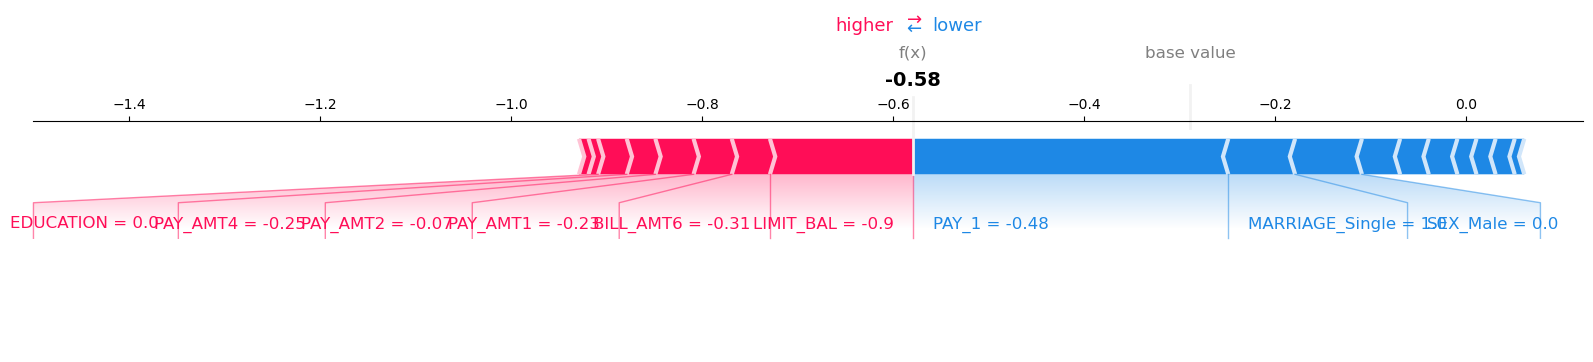

In [106]:
shap.force_plot(
    logreg_explainer.expected_value, 
    np.around(test_logreg_shap_values[ex_zero_index, :], decimals=2), # SHAP values associated with the example we want to explain
    np.around(X_test_enc.iloc[ex_zero_index, :], decimals=2), # Feature vector of the example 
    matplotlib=True,
)

**Answer 3.** The raw model score is lower than the base value, which is indicated in the prediction of the example as 0 (the client has not defaulted). The important features used in making the prediction are highlighted in red and blue - red represents features that pushed the model score higher, whereas blue represents features that pushed the model score lower. In this case, `LIMIT_BAL`, `BILL_AMT6`, `PAY_AMT1` seemed to have been the reason to push the score towards the higher side, whereas `PAY_1`, `MARRIAGE_Single`, `SEX_Male` played an important role in pushing the score towards the lower side. Out of these features, `LIMIT_BAL` and `PAY_1` have more of an impact on the score since they are closer to the decision boundary. Out of these two, the magnitude of the impact seems to be greater for `PAY_1` because of the greater size of the bar.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

**Answer 1**
- We have an imbalanced class which would likely need a model with balanced weights.
- Test scores of all models are greater than the baseline (dummy) model.
- Using hyperparameter tuning with the linear model (logistic regression) we were able to get a cross validation score of 0.53 with the best hyperparameter C as 469.54077005672974.
- Training non-linear models did not improve the score in this case - this proves that the features mostly have a linear relationship with the target that the linear model is picking up on.
- The test score we got (0.776) was far greater than the validation scores, but we have good reason to trust the test score because of the large sample size of test data.
- On interpreting the important features of the model, we find that the column `PAY_1` has the greatest effect on whether or not the client will default in his/her next payment.

**Answer 2**
- A model to predict whether or not a client will default his next payment has been trained which has a validation score of 0.53 and a test score of 0.776.

**Answer 3**
- Discard one of the two highly correlated features like `PAY_1` and `PAY_2` - to increase throughput and also reduce model complexity
- Focus on maximizing recall so that we are able to find maximum no. of defaulters.
- Increase iterations for cross validations in hyperparameter tuning from 5 to 10 in order to find a more optimized model
- Try different optimizers (RMSProp, Adam) rather than the default in sklearn.

**Answer 4**
- Test score : 0.776
- Metric - F1 score, precision, recall

In [49]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: